In [1]:
import numpy as np
from numpy import abs
from scipy.ndimage import rotate
from numpy.fft import fft2, fftshift, ifft2, fft, ifft
import genops
from matplotlib import pyplot as plt
genops.set_backend(genops.NUMPY)

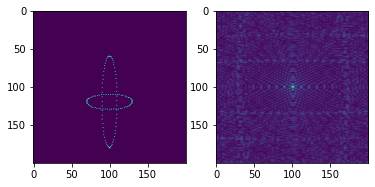

In [2]:
x = genops.zeros([200, 200])
for i in np.arange(0, 6.28, 0.1):
    x[int(120 + 60 * np.cos(i)), int(100 + 10 * np.sin(i))] = 1.0
    x[int(120 + 10 * np.cos(i)), int(100 + 30 * np.sin(i))] = 1.0
plt.subplot(1, 2, 1)
plt.imshow(x)
plt.subplot(1, 2, 2)
fx = abs(fft2(x))
plt.imshow(fftshift(fx))

In [14]:
print((fft(fft(x, axis=0), axis=1) - fft2(x)).sum())
print((fft(fft(x, axis=1), axis=0) - fft2(x)).sum())

(3.648886748308655e-13-2.6849697195744905e-13j)
0j


## Translation & Rotation

Translation invariance:  8.43225948759302e-11


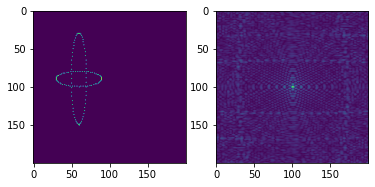

In [35]:
plt.subplot(1, 2, 1)
y = np.roll(x, (-30, -40), (0, 1))
plt.imshow(y)
plt.subplot(1, 2, 2)
fy = abs(fft2(y))
plt.imshow(fftshift(fy))
print("Translation invariance: ", np.abs(fy - fx).sum())

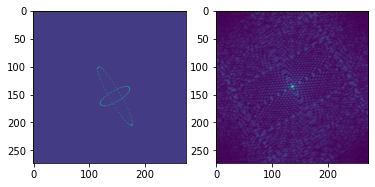

In [25]:
plt.subplot(1, 2, 1)
y = rotate(x, 30)
plt.imshow(y)
plt.subplot(1, 2, 2)
fy = abs(fft2(y))
plt.imshow(fftshift(fy))

## Fourier Slice Theorem

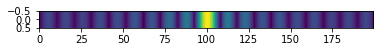

In [62]:
px = x.sum(0)
fpx = abs(fft(px))
plt.imshow(fftshift(fpx[np.newaxis, :]), aspect=10)

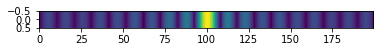

In [66]:
plt.imshow(fftshift(fx[0, :][np.newaxis, :]), aspect=10)